In [1]:
from statsbombpy import sb
import pandas as pd

In [14]:
# Load all competitions
comps = sb.competitions()

# Filter for the Men's FIFA World Cup 2022 (or 2018)
world_cup = comps[(comps['competition_name'] == 'FIFA World Cup') & (comps['season_name'] == '2022')]
# You can change season_name to '2018' if you prefer

# Get competition & season ID
comp_id = world_cup.iloc[0]['competition_id']
season_id = world_cup.iloc[0]['season_id']

world_cup


/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
29,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-06-11T11:30:50.462448,2024-06-11T11:30:50.462448,2024-05-15T10:23:32.854925


In [15]:
# Load all matches in the World Cup
matches = sb.matches(competition_id=comp_id, season_id=season_id)

# Optionally filter for one team or match
# match_id = matches[matches['home_team'] == 'Brazil'].iloc[0]['match_id']

# Example: Get all match IDs
match_ids = matches['match_id'].tolist()

/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [24]:
all_shots = []

for match_id in match_ids:
    events = sb.events(match_id=match_id)
    shots = events[events['type'] == 'Shot'][[
        'player', 'team', 'shot_statsbomb_xg', 'shot_outcome', 'minute'
    ]]
    shots['match_id'] = match_id
    all_shots.append(shots)

# Combine all shots into one DataFrame
shot_df = pd.concat(all_shots, ignore_index=True)

shot_df.head()

/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/stats

,player,team,shot_statsbomb_xg,shot_outcome,minute,match_id
0,Granit Xhaka,Switzerland,0.036566,Blocked,0,3857256
1,Breel-Donald Embolo,Switzerland,0.353289,Saved,0,3857256
2,Granit Xhaka,Switzerland,0.069527,Saved,0,3857256
3,Nikola Milenković,Serbia,0.081609,Off T,4,3857256
4,Andrija Živković,Serbia,0.030002,Post,10,3857256


In [36]:
messi_match_ids = shot_df[shot_df['player']=='Lionel Andrés Messi Cuccittini']['match_id'].unique()

opponents = {}

for match in messi_match_ids:
    events = sb.events(match_id=match)
    teams = events['team'].unique()
    opp = [team for team in teams if team!='Argentina'][0]
    opponents[match] = opp

#game = sb.events(match_id=3869151)

#game.columns

/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/envs/finishing_efficiency/lib/python3.12/site-packages/stats

In [34]:
df = shot_df[shot_df['player']=='Lionel Andrés Messi Cuccittini']
df['opponent'] = df['match_id'].map(opponents)

df[df['shot_outcome']=='Goal']

/var/folders/j5/5dcnmnyd0l3bw21z_qxjwfc40000gn/T/ipykernel_21934/3298649590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opponent'] = df['match_id'].map(opponents)


,player,team,shot_statsbomb_xg,shot_outcome,minute,match_id,opponent
28,Lionel Andrés Messi Cuccittini,Argentina,0.066638,Goal,34,3869151,Australia
147,Lionel Andrés Messi Cuccittini,Argentina,0.783500,Goal,72,3869321,Netherlands
162,Lionel Andrés Messi Cuccittini,Argentina,0.783500,Goal,121,3869321,Netherlands
212,Lionel Andrés Messi Cuccittini,Argentina,0.783500,Goal,22,3869685,France
234,Lionel Andrés Messi Cuccittini,Argentina,0.488404,Goal,107,3869685,France
240,Lionel Andrés Messi Cuccittini,Argentina,0.783500,Goal,121,3869685,France
348,Lionel Andrés Messi Cuccittini,Argentina,0.033920,Goal,63,3857289,Mexico
455,Lionel Andrés Messi Cuccittini,Argentina,0.783500,Goal,33,3869519,Croatia
901,Lionel Andrés Messi Cuccittini,Argentina,0.783500,Goal,9,3857300,Saudi Arabia


In [59]:
# Rename for clarity
shot_df = shot_df.rename(columns={
    'shot_statsbomb_xg': 'xG',
    'shot_outcome': 'outcome'
})

# Create goal indicator
shot_df['is_goal'] = shot_df['outcome'].apply(lambda x: 1 if x == 'Goal' else 0)


# Aggregate per player
player_summary = shot_df.groupby(['player'], as_index=False).agg(
    avg_xG = ('xG','mean'),
    goals = ('is_goal','sum'),
    matches = ('match_id','nunique'),
    num_shots = ('xG','count')
)

# Step 3: Compute total expected goals
player_summary['expected_goals'] = player_summary['avg_xG'] * player_summary['num_shots']

# Step 4: Compute finishing differential
player_summary['finishing_diff'] = player_summary['goals'] - player_summary['expected_goals']
player_summary['finishing_ratio'] = player_summary['goals'] / player_summary['expected_goals']

#player_summary = player_summary.rename(columns={'match_id': 'matches'})

player_summary.head()


,player,avg_xG,goals,matches,num_shots,expected_goals,finishing_diff,finishing_ratio
0,Aaron Mooy,0.039191,0,1,1,0.039191,-0.039191,0.000000
1,Aaron Ramsey,0.025361,0,1,1,0.025361,-0.025361,0.000000
2,Abdelhamid Sabiri,0.226721,1,2,4,0.906884,0.093116,1.102677
3,Abdelkarim Hassan Al Haj Fadlalla,0.045819,0,3,6,0.274915,-0.274915,0.000000
4,Abderrazak Hamdallah,0.271498,0,2,2,0.542997,-0.542997,0.000000


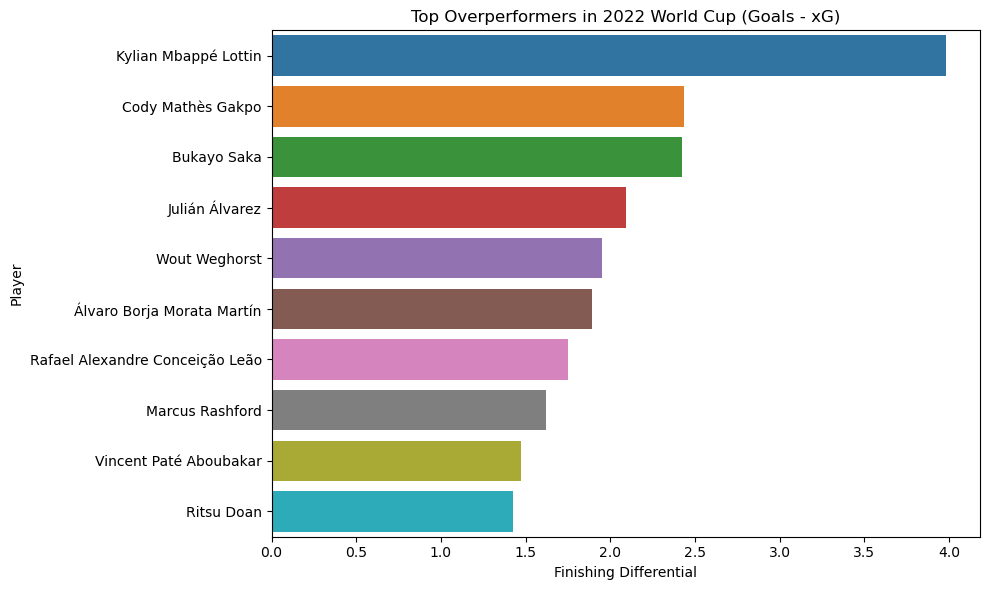

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Filter players with enough shots/xG
#filtered = player_summary[player_summary['xG'] >= 1.0]

# Bar chart of finishing differential
top = player_summary.sort_values('finishing_diff', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top, x='finishing_diff', y='player', hue='player')
plt.title("Top Overperformers in 2022 World Cup (Goals - xG)")
plt.xlabel("Finishing Differential")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

In [72]:
import plotly.express as px
import plotly.graph_objects as go

# Filter players with sufficient shots
filtered = player_summary[player_summary['num_shots'] >= 5].copy()

fig1 = px.scatter(
    filtered,
    x='expected_goals',
    y='finishing_diff',
    size='num_shots',
    hover_name='player',
    hover_data={'expected_goals': True, 'finishing_diff': True, 'goals': True, 'num_shots': True},
    labels={
        'expected_goals': 'Expected Goals (xG)',
        'finishing_diff': 'Finishing Differential (Goals - xG)'
    },
    title='Finishing Differential vs Expected Goals (Interactive)',
    template='simple_white'
)

# Add horizontal reference line at 0 (average finisher)
fig1.add_hline(y=0, line_dash='dash', line_color='gray')

fig1.update_traces(marker=dict(color='mediumseagreen', line=dict(width=1, color='black')))
fig1.update_layout(height=650, width=900,title_x=0.5)
fig1.show()

In [70]:
fig2 = px.scatter(
    filtered,
    x='expected_goals',
    y='finishing_ratio',
    size='num_shots',
    hover_name='player',
    hover_data={'expected_goals': True, 'finishing_ratio': True, 'goals': True, 'num_shots': True},
    labels={
        'expected_goals': 'Expected Goals (xG)',
        'finishing_ratio': 'Finishing Ratio (Goals / xG)'
    },
    title='Finishing Ratio vs Expected Goals',
    template='simple_white'
)

# Add horizontal reference line at 1.0 (average efficiency)
fig2.add_hline(y=1.0, line_dash='dash', line_color='gray')

fig2.update_traces(marker=dict(color='royalblue', line=dict(width=1, color='black')))
fig2.update_layout(height=650, width=900,title_x=0.5)
fig2.show()